# 타이타닉 데이터 분석

- Survived: 생존 여부 (0: 생존하지 못한 경우, 1: 생존한 경우)
- Pclass: 티켓 등급 (1: 1등석, 2: 2등석, 3: 3등석)
- Sex: 승객 성별
- Age: 승객 나이
- Sibsp: 함께 탑승한 형제/자매 또는 배우자의 수
- Parch: 함께 탑승한 부모/자녀의 수
- Fare: 운임 요금
- Embarked: 탑승 항구 (C: Cherbourg, Q: Queenstown, S: Southampton)
- Class : pclass와 동일
- Who : 남자,여자,아이
- deck : 데크 번호(알파벳 + 숫자 혼용)
- Embark_town : 탑승항구 이름
- adult_male : 성인 남자 여부
- alive : 생존여부(no, yes)
- alone : 혼자 탑승 여부

ML 세션 2주차 때 배운 코드를 바탕으로 다음 실습을 진행해봅시다.

In [ ]:
# 모듈 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# Q1: `head`, `info`, `describe`, `shape` 함수를 실행해봅시다.

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
titanic.describe()


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic.shape

(891, 15)

# Q2: 각 변수의 결측치 (NaN 또는 Null)의 개수를 구해봅시다.

In [ ]:
# NaN의 개수 구하기
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# Q3: `class` 별 `fare`에 대한 상자그림(boxplot)을 그려봅시다.

`class`에 대해 `groupby`를 한 후, 상자그림을 그려보세요

<Axes: title={'center': 'fare'}, xlabel='class'>

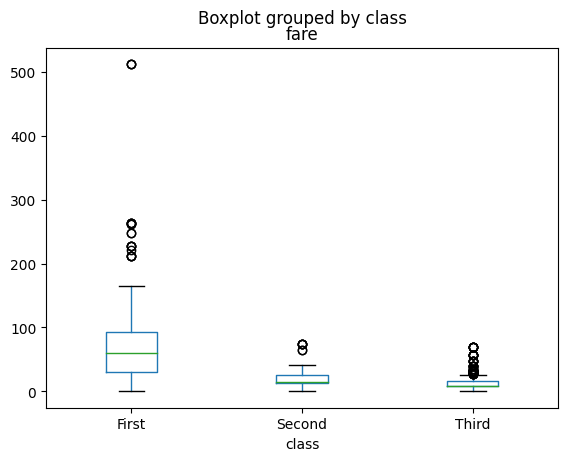

In [ ]:
titanic.boxplot(column='fare', by='class', grid=False)

# Q4: 탑승항구(`embark_town`)별 연령(`age`) 에 대한 산점도(scatterplot)을 그려봅시다


<Axes: xlabel='embark_town', ylabel='age'>

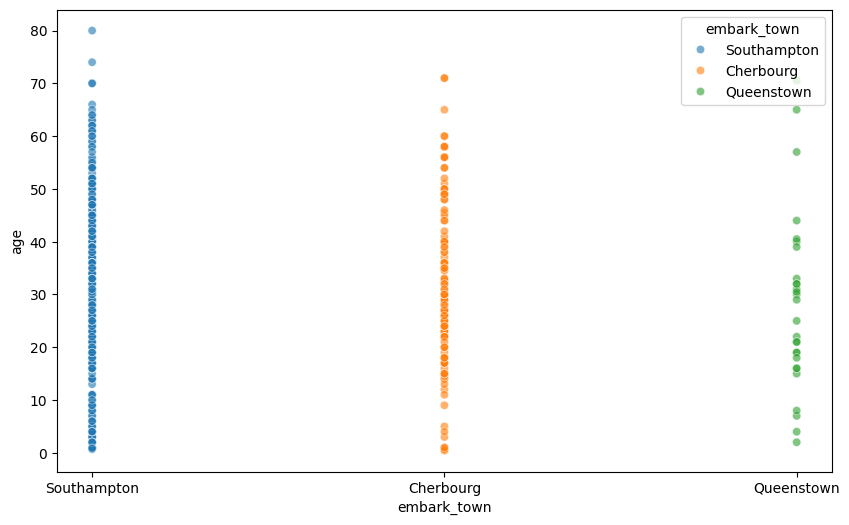

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=titanic, x='embark_town', y='age', hue='embark_town', alpha=0.6)